# Лабораторная работа №4
Работу выполнили: **Созинов Кирилл** и **Хорев Егор**, 19ПМИ-2

Вначале как всегда подключаем основные библиотеки и известный датасет *openml*, с которым будем работать.

In [15]:
from sklearn.datasets import fetch_openml
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns

Загружаем датасет и сразу разделяем данные на обучающую и тестовую выборки

In [3]:
mnist = fetch_openml(name='mnist_784')
mnist.keys()
X_train, X_test = mnist['data'][:60000], mnist['data'][60000:]
y_train, y_test = mnist['target'][:60000], mnist['target'][60000:]

In [13]:
X_train

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
y_train

0        5
1        0
2        4
3        1
4        9
        ..
59995    8
59996    3
59997    5
59998    6
59999    8
Name: class, Length: 60000, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

Примерно так выглядят изображения

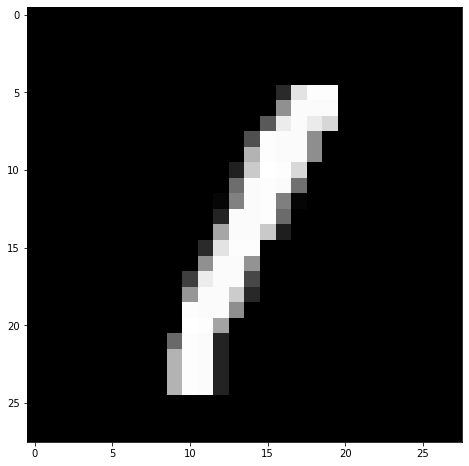

Class #1


In [16]:
i = 77   #номер изображения
plt.figure(figsize=(8, 8))
plt.imshow(X_train.iloc[i].values.reshape((28, 28)), cmap='gray')
plt.show()
print("Class #"+str(y_train[i]))

Первым классификатором, с которым мы будем работать будет `RandomForestClassifier`

In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [18]:
%%time
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
y_pred

Wall time: 39.5 s


array(['7', '2', '1', ..., '4', '5', '6'], dtype=object)

In [19]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9691


Получаем следующее значение точности. Теперь попробуем улучшить значение точности оптимизацией гиперпараметров.

В ходе работы мы генерируем сущность `param_dist`, содержащую, для каждого гиперпараметра, диапазон значений, которые нужно испытать. Далее, мы инициализируем объект `rs` с помощью функции `RandomizedSearchCV()`, передавая ей RF-модель, `param_dist`, число итераций и число кросс-валидаций, которые нужно выполнить.

In [21]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 500, num = 10)]
max_features = ['log2', 'sqrt']
max_depth = [int(x) for x in np.linspace(start = 1, stop = 15, num = 15)]
min_samples_split = [int(x) for x in np.linspace(start = 2, stop = 20, num = 10)]
min_samples_leaf = [int(x) for x in np.linspace(start = 2, stop = 20, num = 10)]
bootstrap = [True, False]
param_dist = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
rs = RandomizedSearchCV(rf_model, 
                        param_dist, 
                        n_iter = 100, 
                        cv = 3, 
                        verbose = 1, 
                        n_jobs=-1, 
                        random_state=0)
rs.fit(X_train, y_train)
rs.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


{'n_estimators': 322,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 15,
 'bootstrap': False}

При значениях параметров `n_iter = 100` и `cv = 3`, мы создали 300 RF-моделей, случайно выбирая комбинации представленных выше гиперпараметров.

Соберем результат работы алгоритма в датафрейм и выведем его лучшие результаты:

In [38]:
rs_df = pd.DataFrame(rs.cv_results_).sort_values('rank_test_score').reset_index(drop=True)
rs_df = rs_df.drop([
            'mean_fit_time', 
            'std_fit_time', 
            'mean_score_time',
            'std_score_time', 
            'params', 
            'split0_test_score', 
            'split1_test_score', 
            'split2_test_score', 
            'std_test_score'],
            axis=1)
rs_df.head()

,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_bootstrap,mean_test_score,rank_test_score
0,322,10,2,sqrt,15,False,0.963900,1
1,233,10,2,sqrt,14,False,0.961933,2
2,366,6,2,sqrt,13,False,0.961283,3
3,100,2,8,sqrt,15,False,0.957967,4
4,366,10,4,log2,15,False,0.957800,5


Теперь визуализируем датафрейм для дальнейшего анализа:

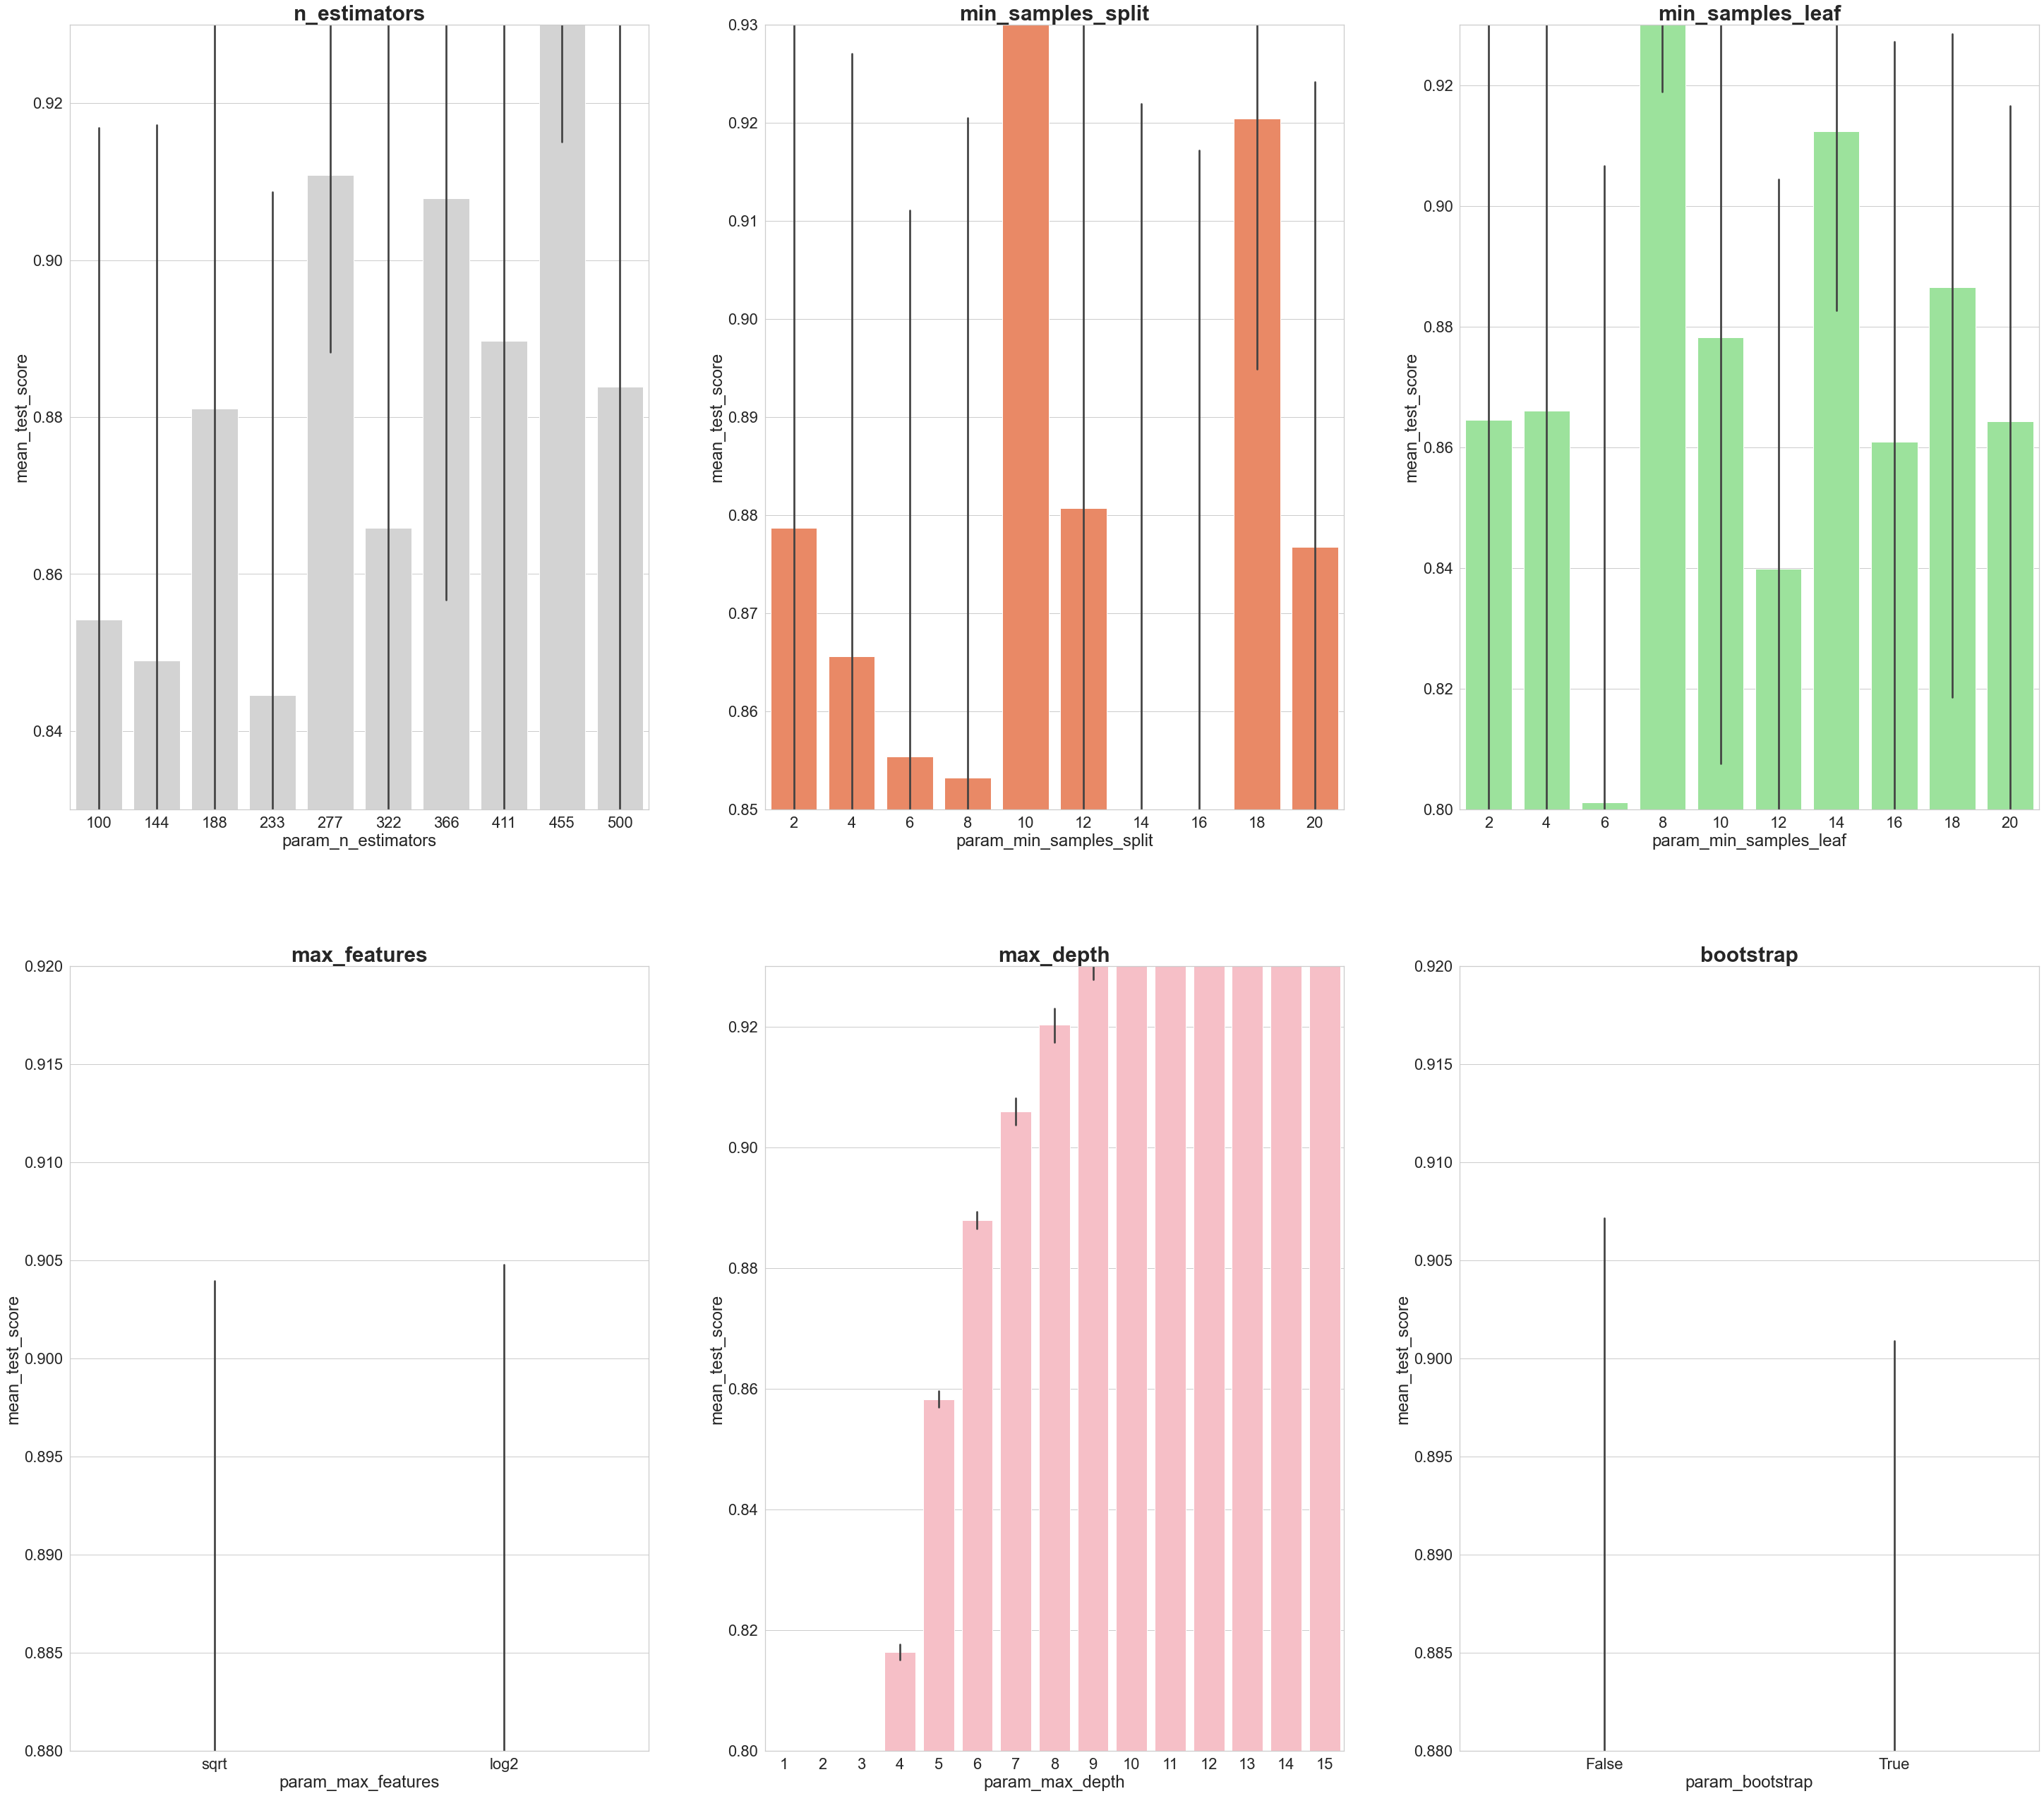

In [29]:
import seaborn as sns
fig, axs = plt.subplots(ncols=3, nrows=2)
sns.set(style="whitegrid", color_codes=True, font_scale = 2)
fig.set_size_inches(50,45)
sns.barplot(x='param_n_estimators', y='mean_test_score', data=rs_df, ax=axs[0,0], color='lightgrey')
axs[0,0].set_ylim([.83,.93])
axs[0,0].set_title(label = 'n_estimators', size=30, weight='bold')
sns.barplot(x='param_min_samples_split', y='mean_test_score', data=rs_df, ax=axs[0,1], color='coral')
axs[0,1].set_ylim([.85,.93])
axs[0,1].set_title(label = 'min_samples_split', size=30, weight='bold')
sns.barplot(x='param_min_samples_leaf', y='mean_test_score', data=rs_df, ax=axs[0,2], color='lightgreen')
axs[0,2].set_ylim([.80,.93])
axs[0,2].set_title(label = 'min_samples_leaf', size=30, weight='bold')
sns.barplot(x='param_max_features', y='mean_test_score', data=rs_df, ax=axs[1,0], color='wheat')
axs[1,0].set_ylim([.88,.92])
axs[1,0].set_title(label = 'max_features', size=30, weight='bold')
sns.barplot(x='param_max_depth', y='mean_test_score', data=rs_df, ax=axs[1,1], color='lightpink')
axs[1,1].set_ylim([.80,.93])
axs[1,1].set_title(label = 'max_depth', size=30, weight='bold')
sns.barplot(x='param_bootstrap',y='mean_test_score', data=rs_df, ax=axs[1,2], color='skyblue')
axs[1,2].set_ylim([.88,.92])
axs[1,2].set_title(label = 'bootstrap', size=30, weight='bold')
plt.show()

Если проанализировать вышеприведённые графики, то можно заметить некоторые интересные вещи, говорящие о том, как, в среднем, каждое значение гиперпараметра влияет на модель:
- `n_estimators`: значения 277, 366 и особенно 455, видимо, показывают наилучшие средние результаты.
- `min_samples_split`: Значения 10 и 18 показывают наилучшие результаты.
- `min_samples_leaf`: Лучшими значениями являются 8 и 14.
- `max_features`: вариант `log2` даёт чуть более высокий средний результат, чем `sqrt`.
- `max_depth`: начиная с 9 показывают очень высокий результат все выбранные значения.
- `bootstrap` лучше не использовать

После применения алгоритма `RandomizedSearchCV` воспользуемся алгоритмом `GridSearchCV` из того же `sklearn` для проведения более точного поиска наилучшей комбинации гиперпараметров. 

Используя то, что мы выяснили с помощью `RandomizedSearchCV`, исследуем значения гиперпараметров, которые лучше всего себя показали:

In [40]:
from sklearn.model_selection import GridSearchCV
n_estimators = [322,233,366,100]
max_features = ['log2']
max_depth = [9,10,11,12,13,14,15]
min_samples_split = [10]
min_samples_leaf = [8]
bootstrap = [False]
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
gs = GridSearchCV(rf_model, param_grid, cv = 3, verbose = 1, n_jobs=-1)
gs.fit(X_train, y_train)
rfc_3 = gs.best_estimator_
gs.best_params_

Fitting 3 folds for each of 28 candidates, totalling 84 fits


{'bootstrap': False,
 'max_depth': 15,
 'max_features': 'log2',
 'min_samples_leaf': 8,
 'min_samples_split': 10,
 'n_estimators': 366}

Здесь мы применяем *кросс-валидацию* по 3 блокам для 28 сеансов обучения модели, что даёт 84 сеанса обучения модели.

Теперь же обратимся к `best_params`, использовав полученные значения для обучения модели

In [41]:
rf_model = RandomForestClassifier(n_estimators = 366, min_samples_split = 10, min_samples_leaf = 8, max_features ='log2', max_depth = 15, bootstrap=False)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9589


Вспомним точность, полученную без задания гиперпараметров вручную:

In [93]:
%%time
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9691
Wall time: 38.5 s


Как можно заметить, несмотря на тщательный подбор гиперпараметров, модель со стандартными настройками показала более хороший результат.

В дальнейшем анализе нам понадобится матрица ошибок

In [19]:
from sklearn.metrics import confusion_matrix
conf_matrix_baseline = pd.DataFrame(confusion_matrix(y_test, y_pred))
display(conf_matrix_baseline)

,0,1,2,3,4,5,6,7,8,9
0,972,0,0,0,0,2,1,1,3,1
1,0,1122,2,4,0,1,3,0,2,1
2,6,0,999,5,3,0,3,9,7,0
3,1,0,10,974,0,7,0,9,5,4
4,3,0,2,0,954,0,5,0,2,16
5,5,0,1,15,3,857,4,1,4,2
6,6,3,0,0,3,4,938,0,4,0
7,1,4,19,1,2,0,0,989,0,12
8,4,0,4,7,6,6,5,5,926,11
9,5,5,2,10,13,4,1,5,4,960


Посмотрев на матрицу можно сделать следующие выводы:
- Хуже всего определяется класс `5`. Также сравнительно хуже угадываются классы `6` и `8`.
- Лучше всех определяется класс `1`.
- Класс `7` путается с классом `2`, класс `4` путается с классом `9` и `9` путается с `4`. Объясняется это конечно же внешним сходством этих цифр.

Также определим пиксели, имеющие наибольшую важность:

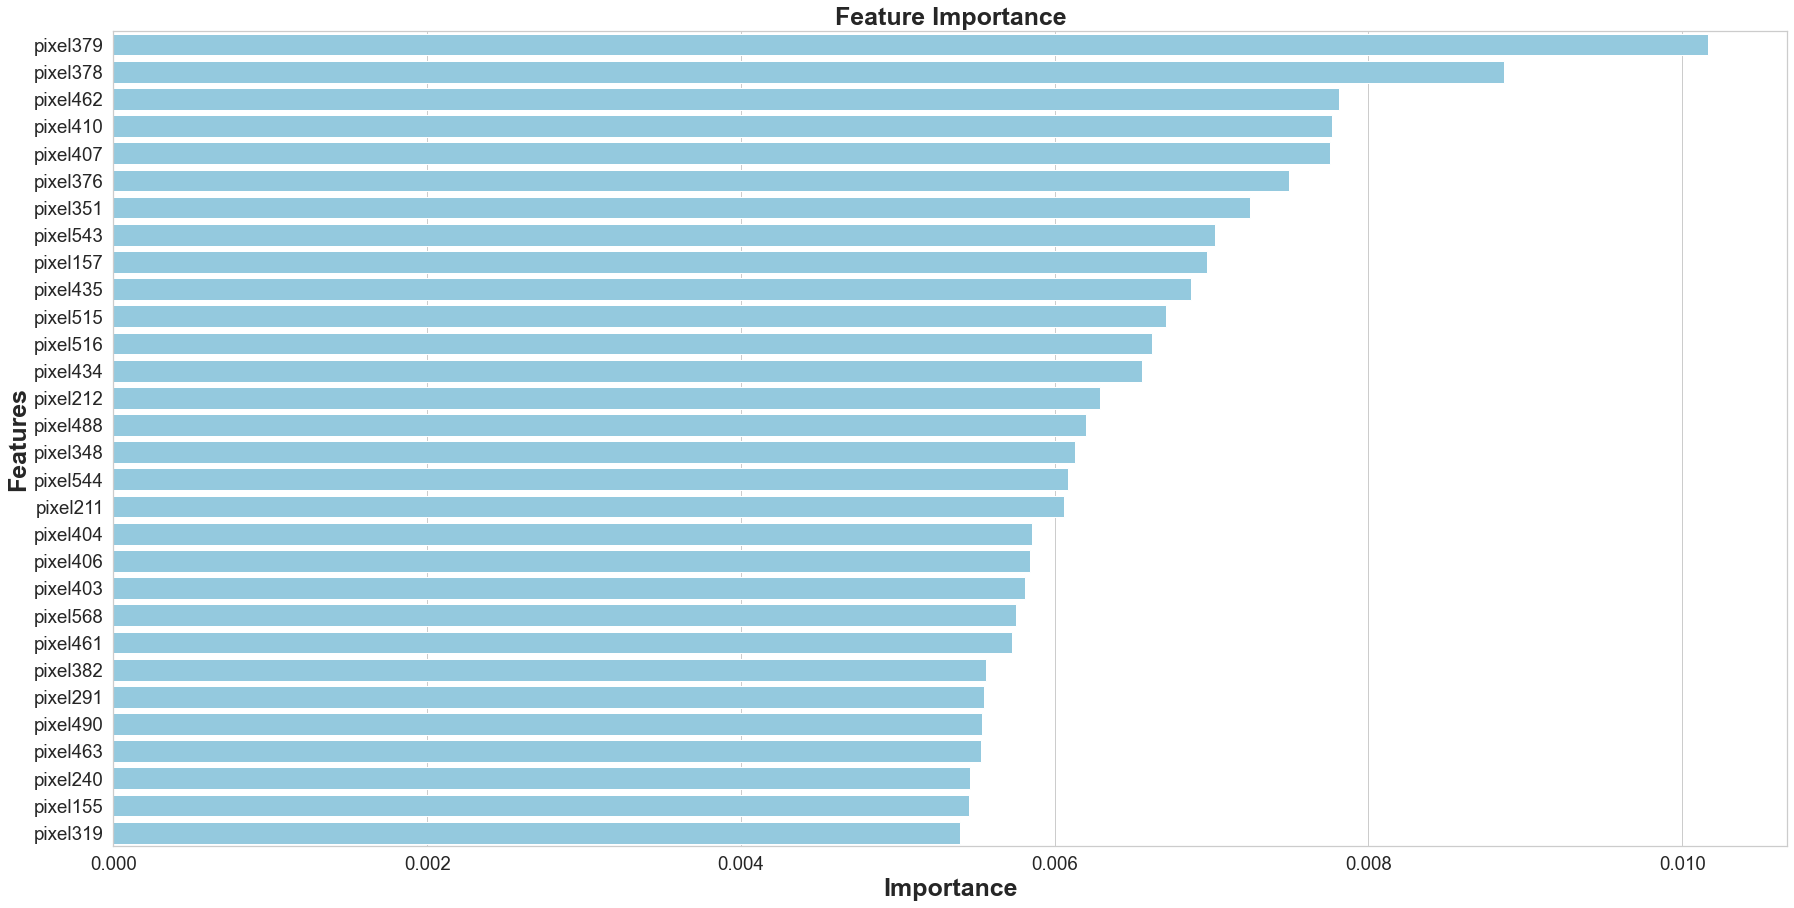

None

,Features,Gini-Importance
0,pixel379,0.010163
1,pixel378,0.008866
2,pixel462,0.007809
3,pixel410,0.007764
4,pixel407,0.007755
5,pixel376,0.007494
6,pixel351,0.007242
7,pixel543,0.007022
8,pixel157,0.006971
9,pixel435,0.006869


In [66]:
feats = {}
for feature, importance in zip(mnist['data'].columns, rf_model.feature_importances_):
    feats[feature] = importance
importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-Importance'})
importances = importances.sort_values(by='Gini-Importance', ascending=False)
importances = importances.reset_index()
importances = importances.rename(columns={'index': 'Features'})
importances = importances[:30]
#importances["Gini-Importance"] = importances["Gini-Importance"].apply(lambda x: x * 10)
sns.set(font_scale = 5)
sns.set(style="whitegrid", color_codes=True, font_scale = 1.7)
fig, ax = plt.subplots()
fig.set_size_inches(30,15)
sns.barplot(x=importances['Gini-Importance'], y=importances['Features'], data=importances, color='skyblue')
plt.xlabel('Importance', fontsize=25, weight = 'bold')
plt.ylabel('Features', fontsize=25, weight = 'bold')
plt.title('Feature Importance', fontsize=25, weight = 'bold')
display(plt.show())
display(importances)

Пиксели 179 и 178 имеют наибольшую важность. Также можно увидеть, что наибольшую важность имеют пиксели, находящиеся посередине изображения, а крайние пиксели наименьшую.

## Boosting

Теперь посмотрим на классификаторы на основе алгоритма *Boosting*. Начнем с встроенного в *sklearn* классификатора под названием `AdaBoostClassifier`.

### Библиотека из sklearn

In [102]:
%%time
from sklearn.ensemble import AdaBoostClassifier
adb_model = AdaBoostClassifier()
adb_model.fit(X_train, y_train)
y_pred = adb_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.7299
Wall time: 45.8 s


Сразу замечаем, что точность модели заметно хуже чем у `RandomForestClassifier`.

In [116]:
'''
%%time
#base_estimator = None
learning_rate = [float(x) for x in np.linspace(start = 0.05, stop = 1, num = 20)]
n_estimators = [int(x) for x in np.linspace(start = 50, stop = 500, num = 20)]
algorithm = ['SAMME.R']
param_dist = {
               'learning_rate' : learning_rate,
               'n_estimators': n_estimators,
               'algorithm' : algorithm}
rs_adb = RandomizedSearchCV(adb_model, 
                        param_dist, 
                        n_iter = 20, 
                        cv = 3, 
                        verbose = 1, 
                        n_jobs=-1, 
                        random_state=0)
rs_adb.fit(X_train, y_train)
rs_adb.best_params_
'''

Wall time: 1 ms


Тут должна была быть оптимизация параметров, однако такое большое количество сеансов обучения занимает несколько часов непрерывной работы компьютера при максимальной нагрузке процессора, поэтому она отсуствует.

Посмотрим на новую матрицу ошибок:

In [97]:
conf_matrix_baseline = pd.DataFrame(confusion_matrix(y_test, y_pred))
display(conf_matrix_baseline)

,0,1,2,3,4,5,6,7,8,9
0,883,0,25,3,4,28,23,3,3,8
1,0,1070,3,8,3,1,4,25,21,0
2,30,35,596,32,18,8,208,25,75,5
3,28,32,19,678,2,92,30,33,74,22
4,4,2,17,14,708,16,10,80,35,96
5,29,32,6,122,27,526,22,19,71,38
6,20,10,35,6,26,32,822,1,6,0
7,7,16,23,8,14,7,1,804,20,128
8,40,48,11,91,15,34,22,18,661,34
9,9,11,23,32,161,18,1,169,34,551


- Хуже всего определяется классы `5`, `9` и `2`.
- Лучше всех определяется класс `1`.
- Класс `2` очень часто путается с классом `6`, также класс `9` путается с классами `4` и `7`

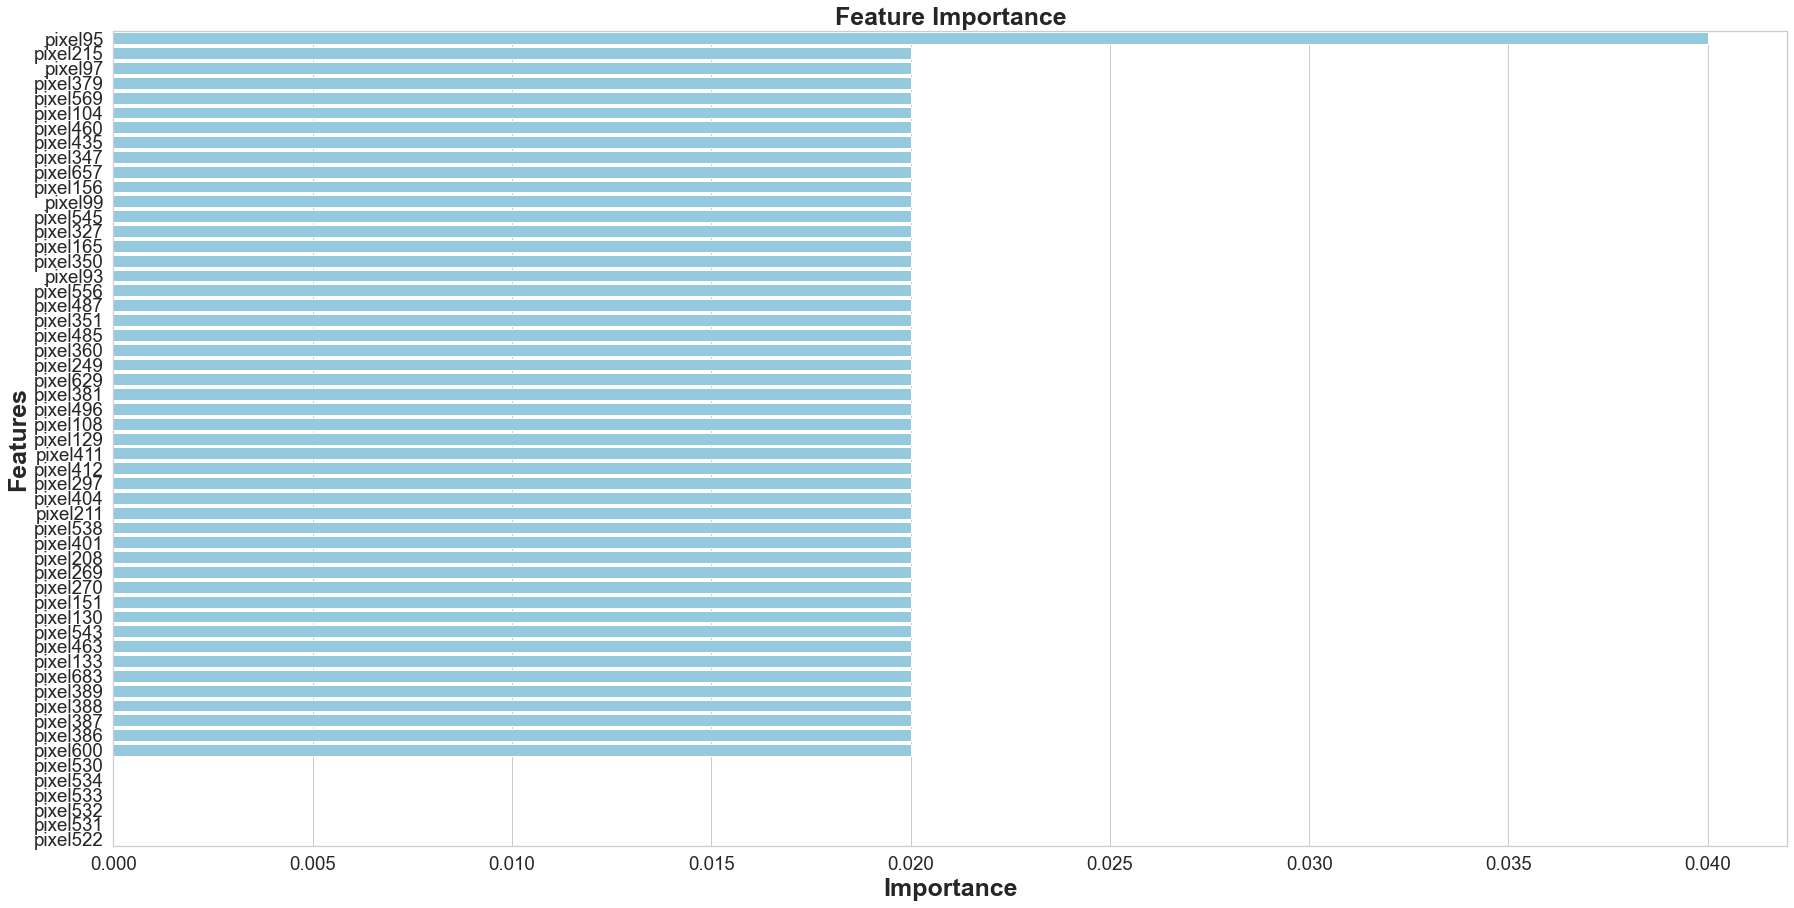

None

,Features,Gini-Importance
0,pixel95,0.04
1,pixel215,0.02
2,pixel97,0.02
3,pixel379,0.02
4,pixel569,0.02
5,pixel104,0.02
6,pixel460,0.02
7,pixel435,0.02
8,pixel347,0.02
9,pixel657,0.02


In [107]:
feats = {}
for feature, importance in zip(mnist['data'].columns, adb_model.feature_importances_):
    feats[feature] = importance
importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-Importance'})
importances = importances.sort_values(by='Gini-Importance', ascending=False)
importances = importances.reset_index()
importances = importances.rename(columns={'index': 'Features'})
importances = importances[:55]
#importances["Gini-Importance"] = importances["Gini-Importance"].apply(lambda x: x * 10)
sns.set(font_scale = 5)
sns.set(style="whitegrid", color_codes=True, font_scale = 1.7)
fig, ax = plt.subplots()
fig.set_size_inches(30,15)
sns.barplot(x=importances['Gini-Importance'], y=importances['Features'], data=importances, color='skyblue')
plt.xlabel('Importance', fontsize=25, weight = 'bold')
plt.ylabel('Features', fontsize=25, weight = 'bold')
plt.title('Feature Importance', fontsize=25, weight = 'bold')
display(plt.show())
display(importances)

При взгляде на *Feature Importance* можно увидеть очень странную картину. Пиксель `95` имеет наибольшую важность в 0,04, дальше 48 пикселей имеют важность 0,02. Остальные стремятся к нулю

### Внешняя библиотека

Теперь попробуем `CatBoostClassifier`

In [8]:
%%time
from catboost import CatBoostClassifier
cat = CatBoostClassifier()
cat.fit(X_train,y_train,verbose=1, plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.097501
0:	learn: 2.0000537	total: 1.66s	remaining: 27m 41s
1:	learn: 1.8077927	total: 3.25s	remaining: 27m 4s
2:	learn: 1.6561870	total: 4.89s	remaining: 27m 7s
3:	learn: 1.5398948	total: 6.49s	remaining: 26m 56s
4:	learn: 1.4392984	total: 8.15s	remaining: 27m 1s
5:	learn: 1.3385143	total: 9.81s	remaining: 27m 5s
6:	learn: 1.2513720	total: 11.4s	remaining: 27m 2s
7:	learn: 1.1839052	total: 13s	remaining: 26m 51s
8:	learn: 1.1195482	total: 14.6s	remaining: 26m 49s
9:	learn: 1.0614344	total: 16.2s	remaining: 26m 47s
10:	learn: 1.0052661	total: 17.9s	remaining: 26m 47s
11:	learn: 0.9590889	total: 19.4s	remaining: 26m 38s
12:	learn: 0.9149452	total: 21.1s	remaining: 26m 39s
13:	learn: 0.8804072	total: 22.7s	remaining: 26m 40s
14:	learn: 0.8407541	total: 24.4s	remaining: 26m 40s
15:	learn: 0.8124875	total: 25.9s	remaining: 26m 35s
16:	learn: 0.7847183	total: 27.5s	remaining: 26m 29s
17:	learn: 0.7536690	total: 29.1s	remaining: 26m 28s
18:	learn: 0.7260218	total: 30.8s

153:	learn: 0.1477939	total: 4m 1s	remaining: 22m 7s
154:	learn: 0.1468808	total: 4m 3s	remaining: 22m 5s
155:	learn: 0.1464068	total: 4m 4s	remaining: 22m 2s
156:	learn: 0.1459507	total: 4m 6s	remaining: 22m
157:	learn: 0.1458230	total: 4m 7s	remaining: 21m 58s
158:	learn: 0.1454687	total: 4m 9s	remaining: 21m 57s
159:	learn: 0.1452775	total: 4m 10s	remaining: 21m 55s
160:	learn: 0.1445287	total: 4m 12s	remaining: 21m 54s
161:	learn: 0.1438639	total: 4m 13s	remaining: 21m 52s
162:	learn: 0.1435309	total: 4m 15s	remaining: 21m 50s
163:	learn: 0.1434349	total: 4m 16s	remaining: 21m 47s
164:	learn: 0.1432929	total: 4m 18s	remaining: 21m 45s
165:	learn: 0.1431961	total: 4m 19s	remaining: 21m 43s
166:	learn: 0.1431377	total: 4m 20s	remaining: 21m 41s
167:	learn: 0.1425342	total: 4m 22s	remaining: 21m 39s
168:	learn: 0.1424158	total: 4m 23s	remaining: 21m 37s
169:	learn: 0.1417959	total: 4m 25s	remaining: 21m 35s
170:	learn: 0.1416637	total: 4m 26s	remaining: 21m 33s
171:	learn: 0.1409758	t

304:	learn: 0.1168537	total: 7m 41s	remaining: 17m 31s
305:	learn: 0.1168308	total: 7m 42s	remaining: 17m 29s
306:	learn: 0.1167588	total: 7m 44s	remaining: 17m 27s
307:	learn: 0.1163973	total: 7m 45s	remaining: 17m 26s
308:	learn: 0.1161384	total: 7m 47s	remaining: 17m 24s
309:	learn: 0.1160312	total: 7m 48s	remaining: 17m 22s
310:	learn: 0.1159767	total: 7m 50s	remaining: 17m 21s
311:	learn: 0.1155917	total: 7m 51s	remaining: 17m 20s
312:	learn: 0.1153286	total: 7m 53s	remaining: 17m 18s
313:	learn: 0.1152831	total: 7m 54s	remaining: 17m 17s
314:	learn: 0.1151775	total: 7m 56s	remaining: 17m 15s
315:	learn: 0.1149005	total: 7m 57s	remaining: 17m 14s
316:	learn: 0.1147521	total: 7m 59s	remaining: 17m 12s
317:	learn: 0.1146503	total: 8m	remaining: 17m 11s
318:	learn: 0.1145111	total: 8m 2s	remaining: 17m 10s
319:	learn: 0.1144205	total: 8m 4s	remaining: 17m 8s
320:	learn: 0.1140724	total: 8m 5s	remaining: 17m 7s
321:	learn: 0.1139443	total: 8m 7s	remaining: 17m 5s
322:	learn: 0.1139017

454:	learn: 0.0999182	total: 11m 26s	remaining: 13m 41s
455:	learn: 0.0998710	total: 11m 27s	remaining: 13m 40s
456:	learn: 0.0998568	total: 11m 29s	remaining: 13m 38s
457:	learn: 0.0997844	total: 11m 30s	remaining: 13m 37s
458:	learn: 0.0996946	total: 11m 32s	remaining: 13m 35s
459:	learn: 0.0996539	total: 11m 33s	remaining: 13m 34s
460:	learn: 0.0996061	total: 11m 35s	remaining: 13m 32s
461:	learn: 0.0995101	total: 11m 36s	remaining: 13m 31s
462:	learn: 0.0994255	total: 11m 38s	remaining: 13m 29s
463:	learn: 0.0993820	total: 11m 39s	remaining: 13m 28s
464:	learn: 0.0993372	total: 11m 41s	remaining: 13m 26s
465:	learn: 0.0991632	total: 11m 42s	remaining: 13m 25s
466:	learn: 0.0991234	total: 11m 44s	remaining: 13m 23s
467:	learn: 0.0991125	total: 11m 45s	remaining: 13m 22s
468:	learn: 0.0990497	total: 11m 47s	remaining: 13m 20s
469:	learn: 0.0990080	total: 11m 48s	remaining: 13m 19s
470:	learn: 0.0989756	total: 11m 50s	remaining: 13m 18s
471:	learn: 0.0989590	total: 11m 52s	remaining: 

602:	learn: 0.0890133	total: 15m 8s	remaining: 9m 57s
603:	learn: 0.0889110	total: 15m 9s	remaining: 9m 56s
604:	learn: 0.0889046	total: 15m 11s	remaining: 9m 55s
605:	learn: 0.0888762	total: 15m 12s	remaining: 9m 53s
606:	learn: 0.0888684	total: 15m 14s	remaining: 9m 52s
607:	learn: 0.0888076	total: 15m 15s	remaining: 9m 50s
608:	learn: 0.0884477	total: 15m 17s	remaining: 9m 49s
609:	learn: 0.0883820	total: 15m 18s	remaining: 9m 47s
610:	learn: 0.0883126	total: 15m 20s	remaining: 9m 46s
611:	learn: 0.0883050	total: 15m 21s	remaining: 9m 44s
612:	learn: 0.0881433	total: 15m 23s	remaining: 9m 42s
613:	learn: 0.0880466	total: 15m 24s	remaining: 9m 41s
614:	learn: 0.0880190	total: 15m 26s	remaining: 9m 39s
615:	learn: 0.0879555	total: 15m 27s	remaining: 9m 38s
616:	learn: 0.0877935	total: 15m 29s	remaining: 9m 36s
617:	learn: 0.0877578	total: 15m 30s	remaining: 9m 35s
618:	learn: 0.0876837	total: 15m 32s	remaining: 9m 33s
619:	learn: 0.0876289	total: 15m 33s	remaining: 9m 32s
620:	learn: 

752:	learn: 0.0799207	total: 18m 52s	remaining: 6m 11s
753:	learn: 0.0798498	total: 18m 54s	remaining: 6m 10s
754:	learn: 0.0798108	total: 18m 55s	remaining: 6m 8s
755:	learn: 0.0797738	total: 18m 57s	remaining: 6m 7s
756:	learn: 0.0797298	total: 18m 58s	remaining: 6m 5s
757:	learn: 0.0795820	total: 19m	remaining: 6m 4s
758:	learn: 0.0795262	total: 19m 1s	remaining: 6m 2s
759:	learn: 0.0794844	total: 19m 3s	remaining: 6m 1s
760:	learn: 0.0793771	total: 19m 4s	remaining: 5m 59s
761:	learn: 0.0793074	total: 19m 6s	remaining: 5m 57s
762:	learn: 0.0790937	total: 19m 7s	remaining: 5m 56s
763:	learn: 0.0790799	total: 19m 9s	remaining: 5m 54s
764:	learn: 0.0790108	total: 19m 10s	remaining: 5m 53s
765:	learn: 0.0788670	total: 19m 12s	remaining: 5m 51s
766:	learn: 0.0788134	total: 19m 13s	remaining: 5m 50s
767:	learn: 0.0787890	total: 19m 15s	remaining: 5m 48s
768:	learn: 0.0787380	total: 19m 16s	remaining: 5m 47s
769:	learn: 0.0787374	total: 19m 18s	remaining: 5m 45s
770:	learn: 0.0787282	tota

903:	learn: 0.0725344	total: 22m 38s	remaining: 2m 24s
904:	learn: 0.0725077	total: 22m 39s	remaining: 2m 22s
905:	learn: 0.0724534	total: 22m 41s	remaining: 2m 21s
906:	learn: 0.0724101	total: 22m 42s	remaining: 2m 19s
907:	learn: 0.0723644	total: 22m 44s	remaining: 2m 18s
908:	learn: 0.0723170	total: 22m 45s	remaining: 2m 16s
909:	learn: 0.0722941	total: 22m 47s	remaining: 2m 15s
910:	learn: 0.0722827	total: 22m 48s	remaining: 2m 13s
911:	learn: 0.0722504	total: 22m 50s	remaining: 2m 12s
912:	learn: 0.0722395	total: 22m 51s	remaining: 2m 10s
913:	learn: 0.0722352	total: 22m 53s	remaining: 2m 9s
914:	learn: 0.0721970	total: 22m 54s	remaining: 2m 7s
915:	learn: 0.0721639	total: 22m 56s	remaining: 2m 6s
916:	learn: 0.0721386	total: 22m 57s	remaining: 2m 4s
917:	learn: 0.0720856	total: 22m 59s	remaining: 2m 3s
918:	learn: 0.0720600	total: 23m	remaining: 2m 1s
919:	learn: 0.0720512	total: 23m 2s	remaining: 2m
920:	learn: 0.0719895	total: 23m 3s	remaining: 1m 58s
921:	learn: 0.0719577	tota

In [9]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9698


Видим также хорошее значение точности, в отличии от второй модели

In [12]:
conf_matrix_baseline = pd.DataFrame(confusion_matrix(y_test, y_pred))
display(conf_matrix_baseline)

,0,1,2,3,4,5,6,7,8,9
0,968,0,1,0,0,3,4,1,3,0
1,0,1119,3,3,1,2,3,0,3,1
2,5,0,1002,5,2,0,2,8,8,0
3,0,0,5,975,0,10,0,9,8,3
4,1,0,1,0,957,0,4,1,3,15
5,3,0,2,14,1,858,5,2,4,3
6,6,3,2,1,4,3,936,0,3,0
7,1,2,21,2,0,0,0,992,1,9
8,5,0,5,8,4,7,2,4,929,10
9,7,6,2,11,11,1,1,3,5,962


- Хуже всего определяется класс `5`.
- Лучше всех определяется класс `1`.
- Класс `7` путается с классом `2`, класс `4` путается с классом `9` и `9` путается с `4`.
В целом ситуация практически идентична классификатору случайного леса.

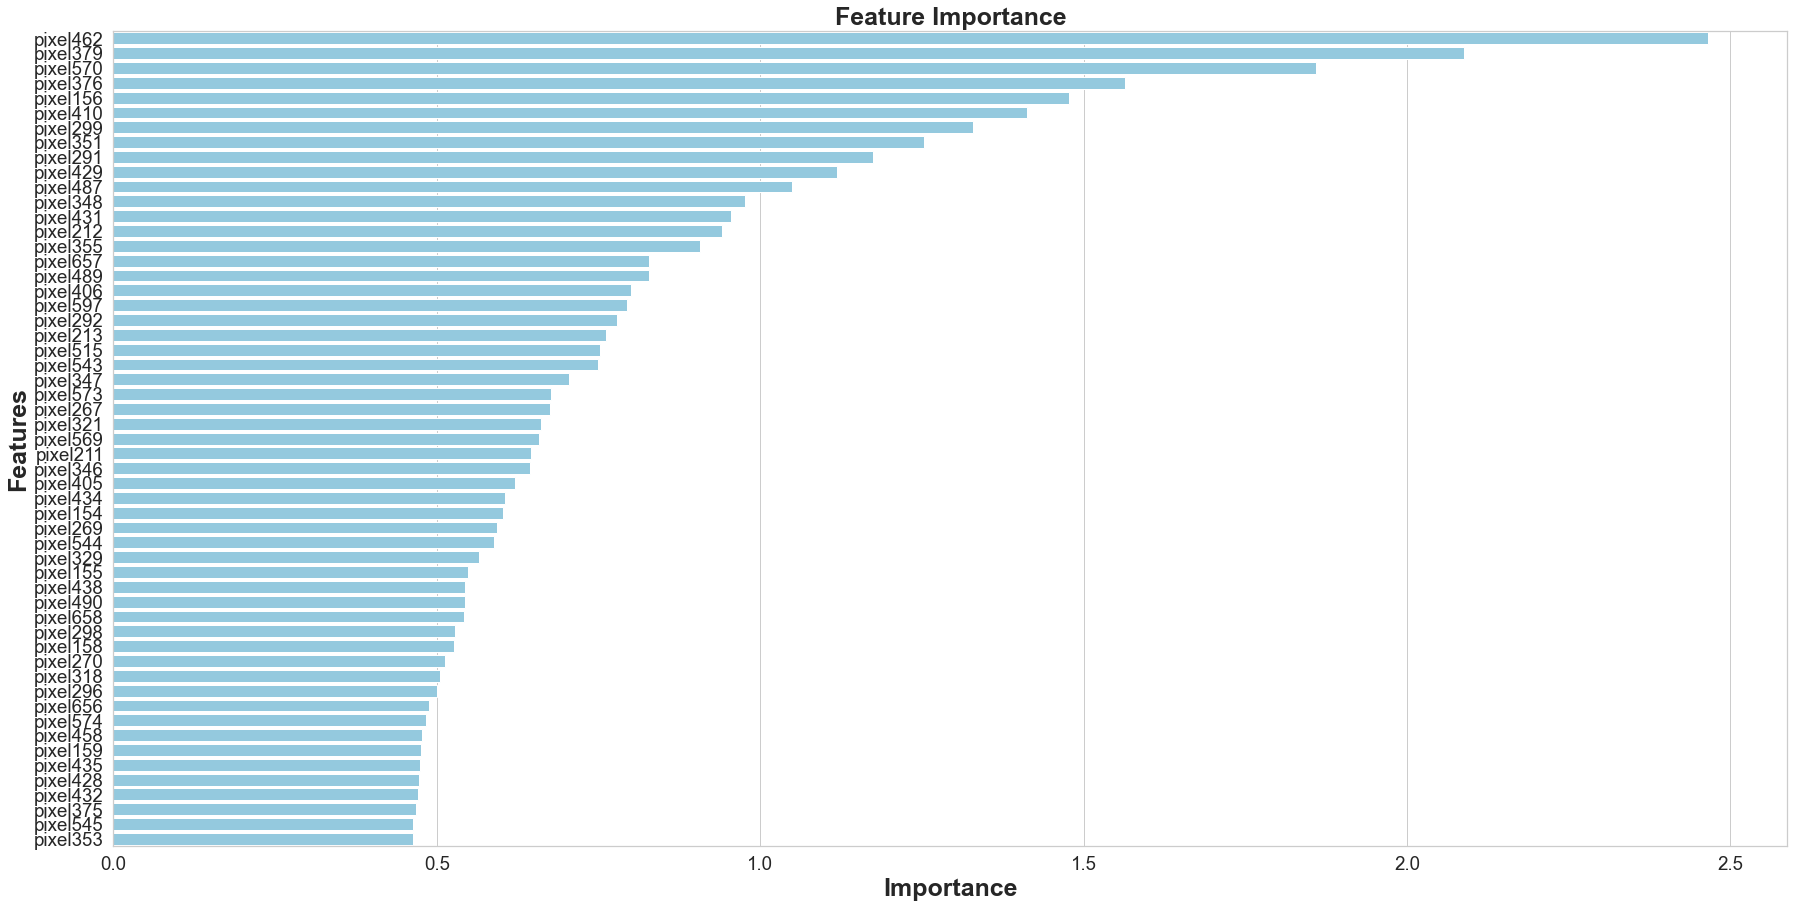

None

,Features,Gini-Importance
0,pixel462,2.465078
1,pixel379,2.088568
2,pixel570,1.859328
3,pixel376,1.563481
4,pixel156,1.477387
5,pixel410,1.411921
6,pixel299,1.328855
7,pixel351,1.253670
8,pixel291,1.174228
9,pixel429,1.118314


In [16]:
feats = {}
for feature, importance in zip(mnist['data'].columns, cat.feature_importances_):
    feats[feature] = importance
importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-Importance'})
importances = importances.sort_values(by='Gini-Importance', ascending=False)
importances = importances.reset_index()
importances = importances.rename(columns={'index': 'Features'})
importances = importances[:55]
#importances["Gini-Importance"] = importances["Gini-Importance"].apply(lambda x: x * 10)
sns.set(font_scale = 5)
sns.set(style="whitegrid", color_codes=True, font_scale = 1.7)
fig, ax = plt.subplots()
fig.set_size_inches(30,15)
sns.barplot(x=importances['Gini-Importance'], y=importances['Features'], data=importances, color='skyblue')
plt.xlabel('Importance', fontsize=25, weight = 'bold')
plt.ylabel('Features', fontsize=25, weight = 'bold')
plt.title('Feature Importance', fontsize=25, weight = 'bold')
display(plt.show())
display(importances)

Пиксели `462`, `379` и `570` имеют наибольную важность.

## Итоговые выводы
- Быстрее всего обучался `RandomForestClassifier`, далее за ним идет `AdaBoost`, ну и самым долгим был `CatBoostClassifier`.
- Классификаторы случайного леса и CatBoost показали себя одинаково хорошо с точки зрения точности, AdaBoost имеет результат значительно хуже.
- Наиболее значимые пиксели находятся в центральной вертикали картинки, что вполне логично.
- Класс 1 всегда угадывается лучше всех, 2 путается с 7 а 4 с 9, ввиду их внешнего сходства, что и подтвердила модель.